## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [3]:
boston_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT', 'RAD_(0, 3]', 'RAD_(3, 4]', 'RAD_(4, 5]', 'RAD_(5, 24]',
       'TAX_(0, 250]', 'TAX_(250, 300]', 'TAX_(300, 360]', 'TAX_(360, 460]',
       'TAX_(460, 712]'],
      dtype='object')

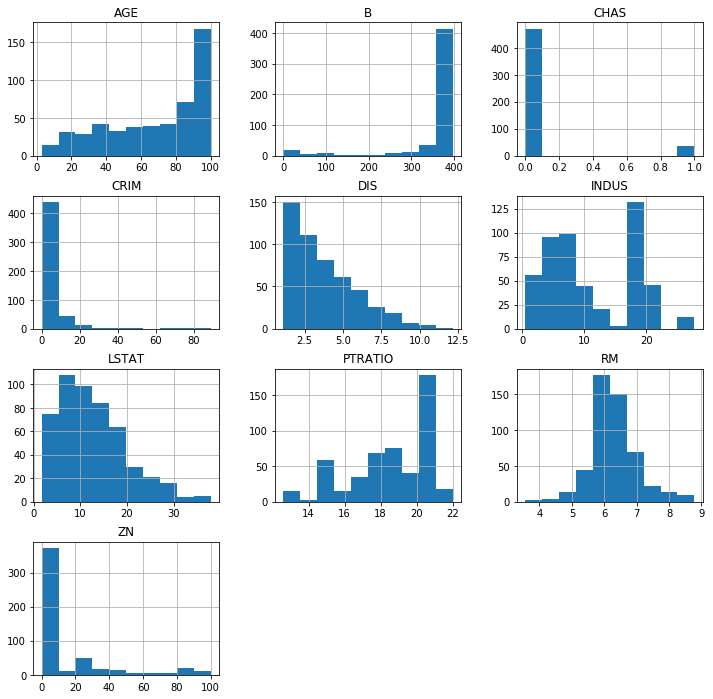

In [10]:
%matplotlib inline
_ = boston_features.iloc[:,:10].hist(figsize=(12,12))

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [11]:
from scipy.stats import normaltest
import numpy as np
for column in boston_features.iloc[:,:10].columns:
    print(column, normaltest(boston_features[column])[0], normaltest(np.log(boston_features[column]))[0])

CRIM 562.7482944823795 120.57749384114634
ZN 228.27025007187007 nan
INDUS 420.09570785887405 32.39815924334509
CHAS 367.2204294388455 nan
RM 37.89574305099423 43.96802643489595
AGE 114.16541878648654 165.69108011896935
DIS 66.94502432373635 97.60300592721512
PTRATIO 45.944962469039645 64.66844499137616
B 312.25596375104647 520.7357420685554
LSTAT 57.20741558175866 14.5513981568336


/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:943: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [12]:
from sklearn.preprocessing import power_transform
transformed_boston_features = power_transform(boston_features.iloc[:,:10], method='yeo-johnson')
_ = transformed_boston_features.hist(figsize=(12,12))

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [13]:
type(boston_features)

pandas.core.frame.DataFrame

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.